Objective: To build model having idf word2vec model, brand, color, image as features.

In [1]:
import pandas as pd
import numpy as np
import pickle

# Loading data
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
data.head()

# Loading word2vec
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)
    
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
df_asins = list(data['asin'])

In [2]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec
vocab = model.keys()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [4]:
from sklearn.metrics import pairwise_distances

# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentence: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

# Utility functions
def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)

In [5]:
from scipy.sparse import hstack

# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands).toarray()

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors).toarray()

In [6]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

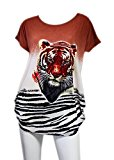

Product Title:  burnt umber tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 1.20420524244
Amazon Url: www.amzon.com/dp/B00JXQB5FQ


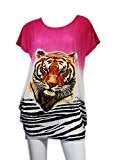

Product Title:  pink tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 8.89881822208
Amazon Url: www.amzon.com/dp/B00JXQASS6


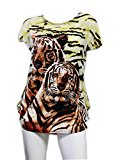

Product Title:  yellow tiger tshirt tiger stripes  l 
Euclidean Distance from input image: 11.3902719975
Amazon Url: www.amzon.com/dp/B00JXQCUIC


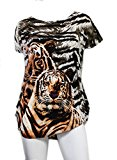

Product Title:  brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean Distance from input image: 12.1246933718
Amazon Url: www.amzon.com/dp/B00JXQCWTO


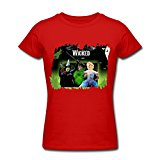

Product Title:  womans wicked musical poster shirts red xxl 
Euclidean Distance from input image: 12.9138096333
Amazon Url: www.amzon.com/dp/B01KUN4VWE


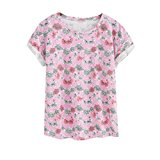

Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image: 13.0911324777
Amazon Url: www.amzon.com/dp/B071FCWD97


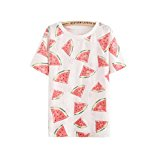

Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image: 13.1004367352
Amazon Url: www.amzon.com/dp/B01JUNHBRM


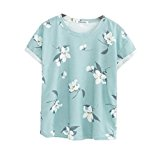

Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image: 13.128179862
Amazon Url: www.amzon.com/dp/B071SBCY9W


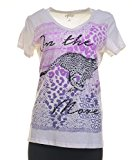

Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image: 13.1441609144
Amazon Url: www.amzon.com/dp/B01CUPYBM0


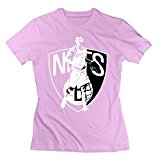

Product Title:  vansty jeremy lin brooklin short sleeves shirt women pink size 
Euclidean Distance from input image: 13.1654735565
Amazon Url: www.amzon.com/dp/B01HU4NSBQ


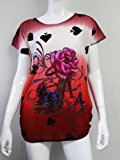

Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image: 13.2431077004
Amazon Url: www.amzon.com/dp/B00JV63QQE


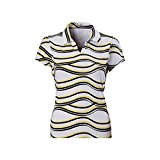

Product Title:  nancy lopez whimsy short sleeve  whiteblacklemon drop  xs 
Euclidean Distance from input image: 13.2487773199
Amazon Url: www.amzon.com/dp/B01MPX6IDX


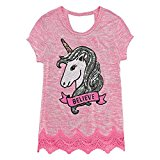

Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image: 13.2501481772
Amazon Url: www.amzon.com/dp/B0177DM70S


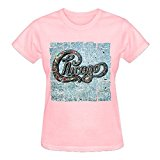

Product Title:  chicago chicago 18 shirt women pink 
Euclidean Distance from input image: 13.2721046246
Amazon Url: www.amzon.com/dp/B01GXAZTRY


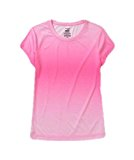

Product Title:  danskin womens vneck loose performance tee xsmall pink ombre 
Euclidean Distance from input image: 13.2801551857
Amazon Url: www.amzon.com/dp/B01F7PHXY8


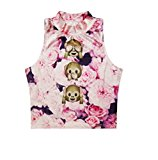

Product Title:  kingde star pink flower dog stamp sleeveless vestbqn24 
Euclidean Distance from input image: 13.286885335
Amazon Url: www.amzon.com/dp/B015H3W9BM


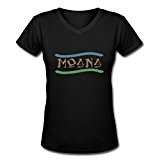

Product Title:  moana logo adults hot v neck shirt black xxl 
Euclidean Distance from input image: 13.2870290792
Amazon Url: www.amzon.com/dp/B01LX6H43D


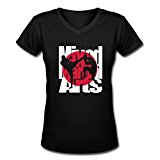

Product Title:  women japanese mixed martial arts teeblack tshirts hgiorgis xxl black 
Euclidean Distance from input image: 13.2873041887
Amazon Url: www.amzon.com/dp/B01JQ096HW


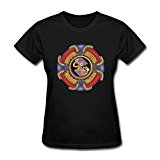

Product Title:  dasy womens neck electric light orchestra logo shirt xxlarge black 
Euclidean Distance from input image: 13.2906418343
Amazon Url: www.amzon.com/dp/B016EXUZC4


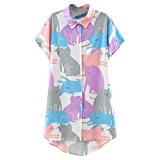

Product Title:  abaday multicolor cartoon cat print short sleeve longline shirt large 
Euclidean Distance from input image: 13.293168906
Amazon Url: www.amzon.com/dp/B01CR57YY0


In [10]:
from IPython.display import Image

def idf_w2v_brand_color_image(doc_id, wt, wb, wc, wi,  num_results):
    # doc_id: apparel's id in given corpus
    # wt: weight for  w2v features
    # wb: weight for brand and color features
    # wc: weight for image features
    # wi: weight for image features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    brand_dist  = pairwise_distances(brand_features, brand_features[doc_id].reshape(1,-1))
    color_dist  = pairwise_distances(color_features, color_features[doc_id].reshape(1,-1))
    
    doc_id = asins.index(df_asins[doc_id])
    # Adding Image features     
    img_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))
    
    pairwise_dist  = (wt * idf_w2v_dist +  wb * brand_dist + wc*color_dist + wi*img_dist)/float(wt + wb + wc + wi)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

idf_w2v_brand_color_image(12566, 5, 5, 5, 5, 20)